In [1]:
# 한글 글꼴 설정
plt.rcParams["font.family"] = 'NanumGothicCoding'

### 데이터 불러오기

In [2]:
df = pd.read_csv('final_tvingvod.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
df.tail()

,actor,broadcast_date,channel,count,crawling_day,crawling_time,genre,p_url,price,program,sale_day,sale_week,title,view_day,view_total,view_week
11595,NaN,20191031,Mnet,NaN,2020.05.01,1,예능,http://www.tving.com/vod/player/E002732620,NaN,퀸덤(Queendom),1.0,4.0,퀸덤 최종화,376,NaN,800
11596,NaN,20200427,MBN,NaN,2020.05.01,1,교양,http://www.tving.com/vod/player/E003046882,NaN,판도라,1.0,1.0,판도라 167화,371,NaN,805
11597,NaN,20170730,tvN,NaN,2020.05.01,1,드라마,http://www.tving.com/vod/player/E001225932,NaN,비밀의 숲,1.0,3.0,비밀의 숲 16화,370,NaN,1017
11598,NaN,20200429,MBN,NaN,2020.05.01,1,교양,http://www.tving.com/vod/player/E003046879,NaN,나는 자연인이다,0.0,0.0,나는 자연인이다 397화,365,NaN,37
11599,NaN,20180726,tvN,NaN,2020.05.01,1,드라마,http://www.tving.com/vod/player/E001660476,NaN,김비서가 왜 그럴까,1.0,4.0,김비서가 왜 그럴까 16화,361,NaN,840


### 장르별 비율

In [4]:
df['count'] = 1
df_gb = df.groupby('genre').count().sort_values(
    'count', ascending=False)  # 장르로 그룹바이 -> count -> cout기준으로 정렬

In [5]:
# information of groups
group_names = ['예능', '드라마', '교양', '키즈/애니', '디지털오리지널', '예능/뮤직',
               '키즈/어린이', '해외시리즈']
group_sizes = df_gb['count']
group_explodes = (0, 0.02, 0.02, 0.04, 0.08, 0.1, 0.15, 0.3)
colors = plt.cm.GnBu(np.linspace(1, 0, 8))

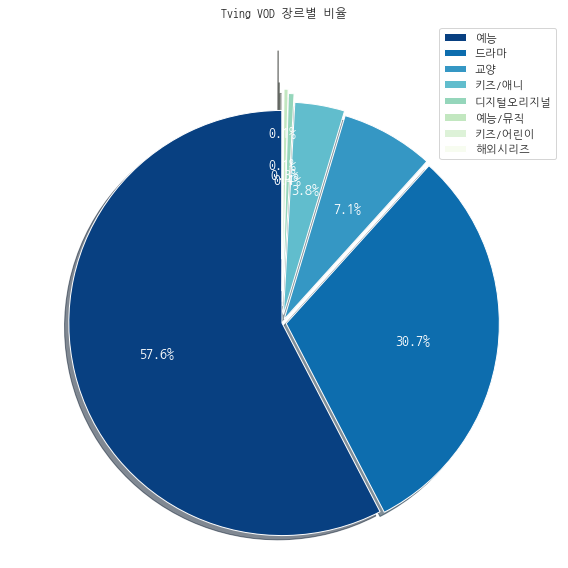

In [6]:
# Pie chart
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.pie(group_sizes,
        explode=group_explodes,
        autopct='%1.1f%%',  # first decimal place
        shadow=True,
        startangle=90,
        textprops={'fontsize': 14, 'color': 'w'},  # text font size
        colors=colors)
plt.axis('equal')  # equal lenght of X and Y axis
plt.legend(group_names)
plt.title("Tving VOD 장르별 비율")
plt.tight_layout()
plt.show()

### 시간대별 미리보기 횟수

In [3]:
colors = plt.cm.GnBu(np.linspace(0.2, 1, 4))

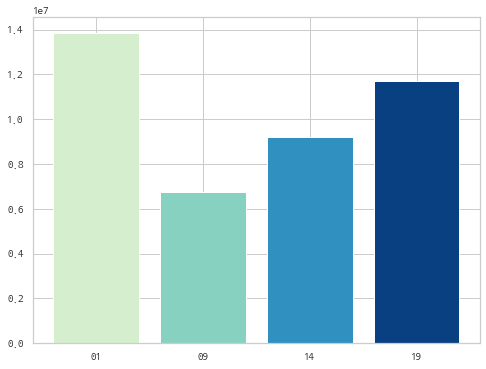

In [4]:
%matplotlib inline

plt.figure(figsize=(8, 6))
df_view = df.groupby('crawling_time').sum()  # 시간으로 그룹바이 -> 합계
plt.bar(x=['01', '09', '14', '19'], height=df_view['view_day'], color=colors)
plt.show()

### 시간대별 VOD 판매량

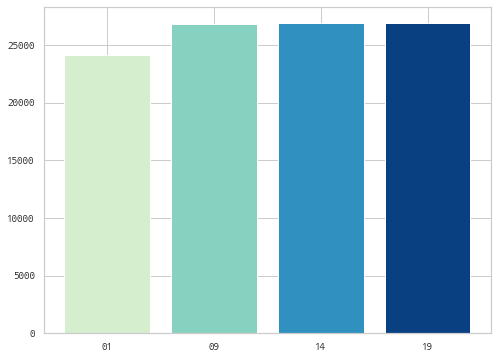

In [5]:
plt.figure(figsize=(8, 6))
df_view = df.groupby('crawling_time').sum()  # 시간으로 그룹바이 -> 합계
plt.bar(x=['01', '09', '14', '19'], height=df_view['sale_day'], color=colors)
plt.show()

### 미리보기와 판매량 관계

In [6]:
df_viewday = df.groupby('program').sum().sort_values(
    'view_day', ascending=False)  # 프로그램으로 그룹바이 -> 합계 -> 미리보기횟수로 정렬
df_view_sale = df_viewday[['view_day', 'sale_day']][:10]    # 상위 10개만
df_view_sale['view_day'] = df_view_sale['view_day'] / 100   # 미리보기 스케일링

<Figure size 720x432 with 0 Axes>

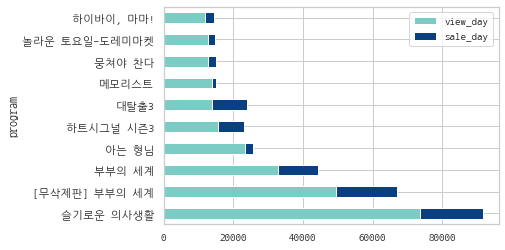

In [7]:
plt.figure(figsize=(10, 6))
df_view_sale.plot.barh(stacked=True, color=plt.cm.GnBu(
    np.linspace(0.5, 1, 2)))  # 미리보기 / 판매량 비율
plt.title("미리보기와 VOD")
plt.show()

### "부부의 세계" 판매주기

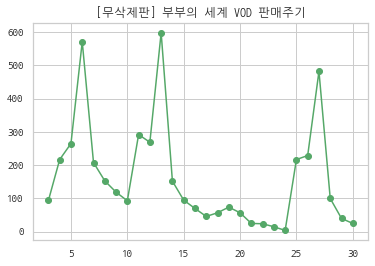

In [7]:
df_bubu = df[df['program'] == '[무삭제판] 부부의 세계']
df_bubu2 = df_bubu[df_bubu['crawling_time'] == 9]['sale_day']  # 9시 판매량 기준
plt.plot(range(3, 31), df_bubu2, marker='o', color='g')
plt.title("[무삭제판] 부부의 세계 VOD 판매주기")
plt.show()

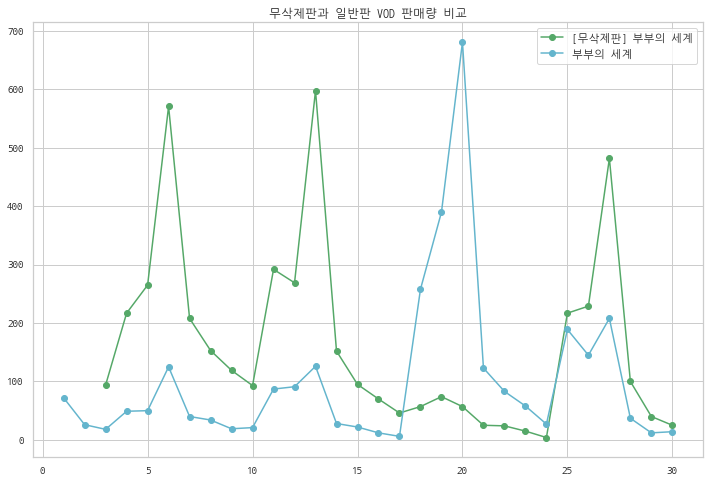

In [8]:
df_bubu3 = df[df['program'] == '부부의 세계']
df_bubu4 = df_bubu3[df_bubu3['crawling_time'] == 9]['sale_day']

plt.figure(figsize=(12, 8))
plt.plot(range(3, 31), df_bubu2, marker='o', color='g', label='[무삭제판] 부부의 세계')
plt.plot(range(1, 31), df_bubu4, marker='o', color='c', label='부부의 세계')
plt.title("무삭제판과 일반판 VOD 판매량 비교")
plt.legend()
plt.show()

### 닐슨 시청률

In [9]:
# 데이터 불러오기
df_rate = pd.read_csv("2004_cable.csv", index_col=0)
df_ground = pd.read_csv('2004_지상파_시청률.csv', index_col=0)
# 케이블 시청률만
df_cable = df_rate[df_rate['category'] == '케이블']
df_cable.reset_index(drop=True, inplace=True)
# 종편 시청률만
df_com = df_rate[df_rate['category'] == '종편']
df_com.reset_index(drop=True, inplace=True)

In [12]:
# 지상파 시청률 상위권에 가장 많이 랭크 된 프로그램 확인
df_ground['count'] = 1
df_ground_15 = df_ground.groupby('program').count(
).sort_values('count', ascending=False)[:10]
# 상위 10개만
df_ground['top15'] = df_ground['program']
df_ground['top15'] = df_ground['top15'].apply(
    lambda x: 1 if x in list(df_ground_15.index) else 0)
df_ground_top15 = df_ground[df_ground['top15'] == 1]

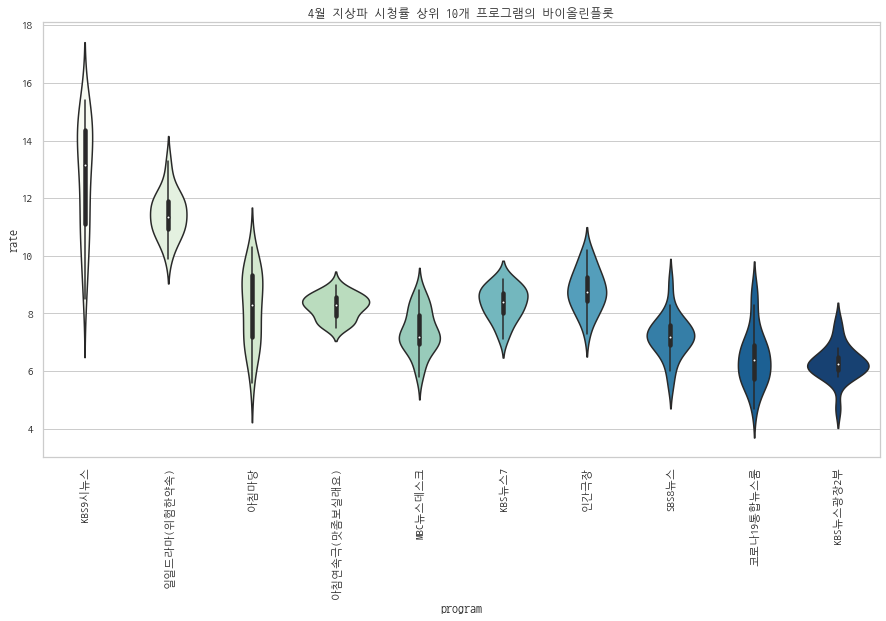

In [13]:
# 지상파 시청률 상위10개 프로그램 바이올린 플롯
plt.figure(figsize=(15, 8))
sns.violinplot(x='program', y='rate', data=df_ground_top15,
               palette=plt.cm.GnBu(np.linspace(0, 1, 10)))
plt.xticks(rotation=90)
plt.title('4월 지상파 시청률 상위 10개 프로그램의 바이올린플롯')
plt.show()

In [16]:
# 케이블 시청률 상위권에 가장 많이 랭크 된 프로그램 10개
df_cable['count'] = 1
df_cable_15 = df_cable.groupby('program').count(
).sort_values('count', ascending=False)[:10]
df_cable['top15'] = df_cable['program']
df_cable['top15'] = df_cable['top15'].apply(
    lambda x: 1 if x in list(df_cable_15.index) else 0)
df_cable_top15 = df_cable[df_cable['top15'] == 1]

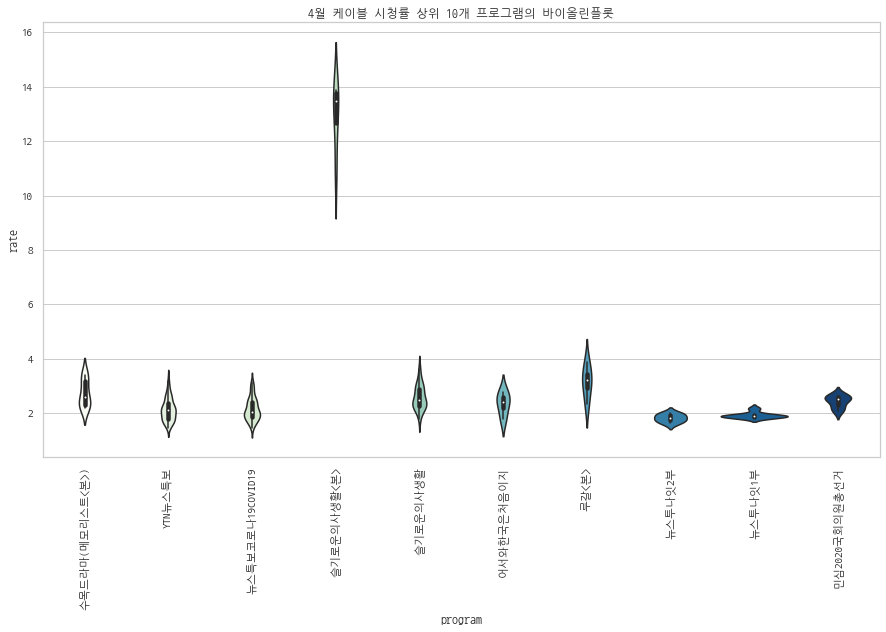

In [17]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='program', y='rate', data=df_cable_top15,
               palette=plt.cm.GnBu(np.linspace(0, 1, 10)))
plt.xticks(rotation=90)
plt.title('4월 케이블 시청률 상위 10개 프로그램의 바이올린플롯')
plt.show()

In [18]:
# 종편 시청률 상위권에 가장 많이 랭크 된 프로그램 10개
df_com['count'] = 1
df_com_15 = df_com.groupby('program').count(
).sort_values('count', ascending=False)[:10]
df_com['top15'] = df_com['program']
df_com['top15'] = df_com['top15'].apply(
    lambda x: 1 if x in list(df_com_15.index) else 0)
df_com_top15 = df_com[df_com['top15'] == 1]

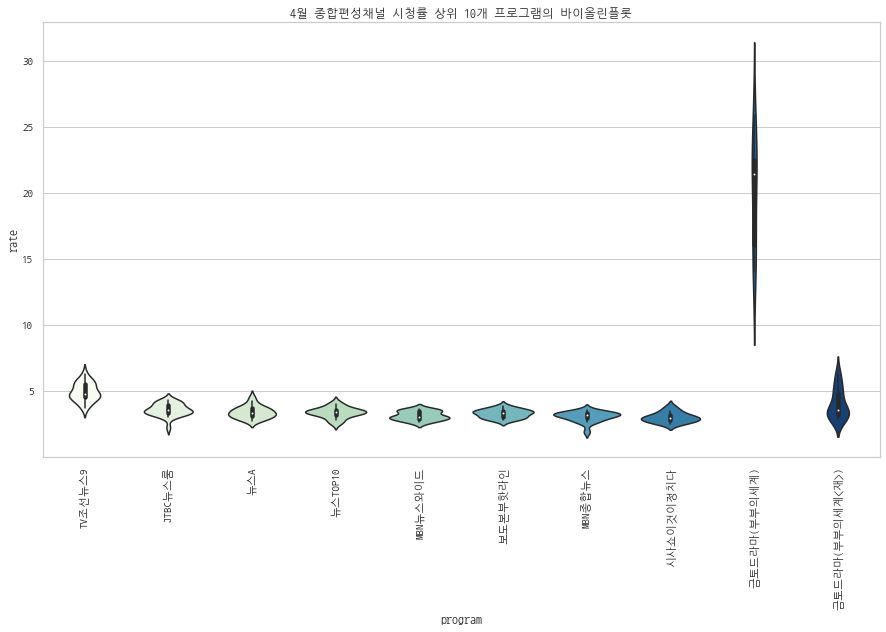

In [19]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='program', y='rate', data=df_com_top15,
               palette=plt.cm.GnBu(np.linspace(0, 1, 10)))
plt.xticks(rotation=90)
plt.title('4월 종합편성채널 시청률 상위 10개 프로그램의 바이올린플롯')
plt.show()